In [1]:
library(dplyr)
library(ggplot2)
library("RColorBrewer")
source("../Scripts/visulizations.r")




Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




In [2]:
celltypes = c("Cytotoxic T cell", "CD4+ T cell", "CD14+ monocyte", "B cell", "Megakaryocyte",
              "Natural killer cell",
              "CD16+ monocyte", "Dendritic cell", "Plasmacytoid dendritic cell")
methods <- c("Seurat",  "SingleR","CellID", "SingleCellNet")  
colors <-brewer.pal(length(celltypes), "Paired")
names(colors) <- celltypes

In [3]:
ref <- read.csv("../Data/Fulldata/PBMC10x_Reference/meta.csv")
full <- read.csv("../Results_old/Files/values_full.csv")
folder <- "../Data/Predictions_curated/"
query <- read.csv("../Data/Fulldata/PBMC_Query/meta.csv")

data <- do.call(rbind, lapply(methods, function(method) get_data_curated("PBMC10x_3090_0_1000.txt",
                                                         paste0(folder, method), method)))
write.csv(data, "../Results_old//Files/summary_results_mosaic.csv")                             
                              


In [4]:
query <- query[,c("id", "class_")]
results <- merge(data, query, by = "id")
measures <- do.call(rbind, lapply(celltypes, function(type) do.call(rbind,
                           lapply(methods,   function(method) do.call(rbind,
                           lapply(unique(results$set),function(set) get_measures(results, type,
                                                                           "PBMC10x", method, set)))))))
measures$set  <- stringr::str_replace(measures$set, "0_", "")                                
measures$set[measures$set == 1000] <- "1000 HVGs" 

full$X <- NULL
full$size <- NULL
full$set <- "200 HVGs"
full <- full[full$method != "ItClust",]
data <- rbind(full, measures)
data$class <- factor(data$class, levels=celltypes)
data$method <- factor(data$method, levels=methods)                        

Warning message:
“Removed 4 rows containing missing values (`geom_point()`).”


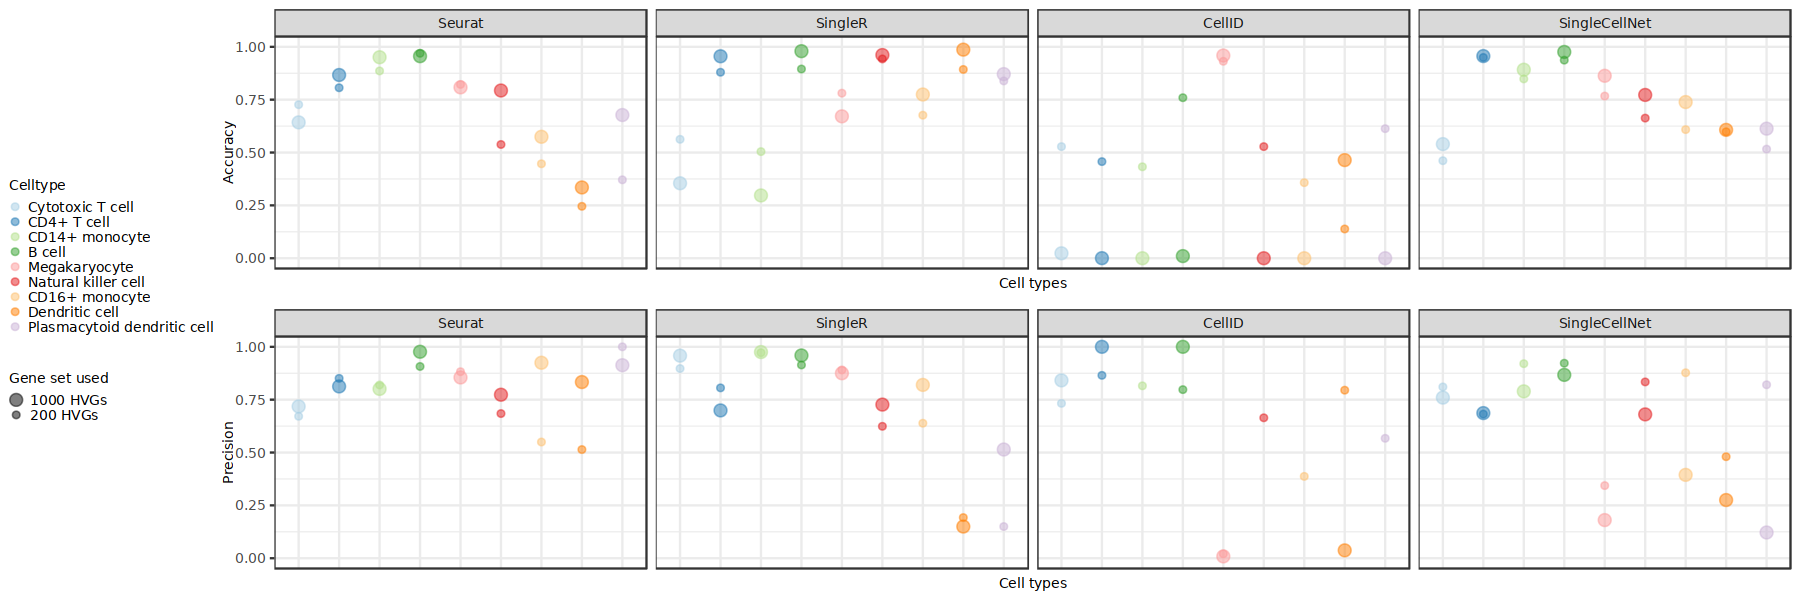

In [5]:
options(repr.plot.width=15, repr.plot.height=5) 



f5a <- get_plot_comparison(data, "Accuracy", colors)
f5b <- get_plot_comparison(data, "Precision", colors)

f5 <- ggpubr::ggarrange(f5a, f5b, nrow=2, ncol=1, common.legend=T, legend="left")
f5

In [6]:
ggsave(
  "../Results/Figures/F5_PBMC_genesets.eps",
  plot = f5,
  device = cairo_ps, fallback_resolution = 600,
  path = NULL,
  scale = 1,
  width = 180,
  height = 100,
  units = "mm",
  dpi = 300,
  limitsize = TRUE,
  bg = NULL
)